           x       y        z  label
0    -0.8811 -4.8399  -7.7228      2
1    -1.0490 -4.5050  -8.5301      2
2    -1.0130 -4.2704  -9.0995      2
3    -0.9489 -3.9566  -9.8840      2
4    -0.9607 -3.8533 -10.2756      2
...      ...     ...      ...    ...
2738 -0.8320  3.1991  -7.0286      1
2739 -2.2576  3.7605  -5.9412      1
2740 -2.2253  3.6642  -5.8802      1
2741 -1.4232  2.7892  -9.5632      1
2742 -4.2303  3.0652 -12.1147      1

[2743 rows x 4 columns]


<AxesSubplot:>

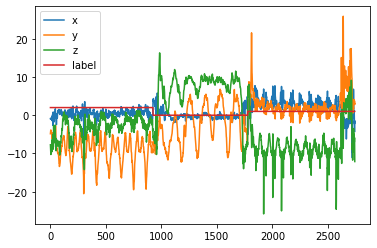

In [7]:
import pandas as pd

#pandasでcsv読込み
df = pd.read_csv('move_data.csv')
print(df)
df.plot()

In [11]:
#使用したラベルを抽出
label_list = df['label'].unique()

#ラベル表示
print(label_list)

[2 0 1]


[[-0.38686    -4.78935    -6.91895     0.8298669   0.97470593  1.95145584]
 [-0.36278    -4.863226   -6.9253      0.83269624  1.10930433  1.95463891]
 [-0.355002   -4.89623    -6.940586    0.82795846  1.12289401  1.97037041]
 ...
 [-0.12223     7.628188   -2.082138    4.31463763  5.5393372   5.92373991]
 [-0.213284    7.519904   -2.395138    4.29259693  5.58062838  5.89669628]
 [-0.342494    7.471284   -2.708138    4.31472106  5.60913624  5.99009669]]
[2. 2. 2. ... 1. 1. 1.]


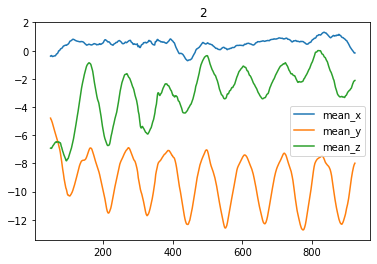

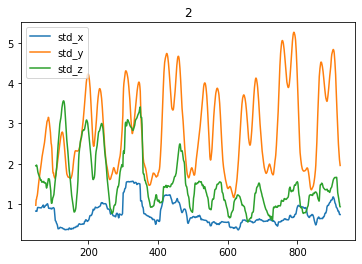

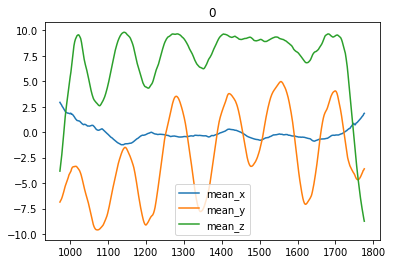

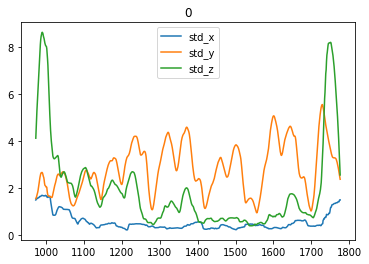

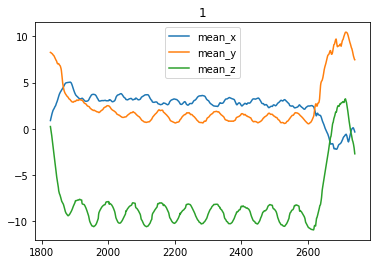

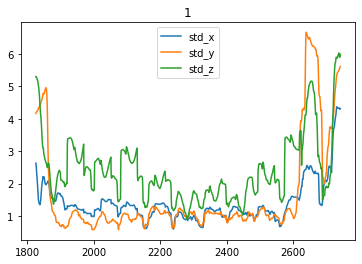

In [12]:
#各ラベル毎に移動平均と標準偏差のデータに変換
import numpy as np

#移動平均と標準偏差で計算対象とするデータ値
n = 50

#空のndarray作成
X = np.empty((0, 6)) #mean_x, mean_y, mean_z, std_x, std_y, std_z
y = np.empty((0))    #label

#label_listの数だけ処理
for label_value in label_list: 
    df_part = df[df['label'] == label_value] #ラベル列がlabelと一致する行のみ抜粋
    df_xyz = df_part.iloc[:, 0:3] #x,y,zのデータ列のみ抜粋

    #移動平均
    df_mean = df_xyz.rolling(n).mean() #n個ずつのデータで平均
    df_mean.columns = ['mean_x', 'mean_y', 'mean_z'] #列名を変更

    #標準偏差
    df_std = df_xyz.rolling(n).std() #n個ずつのデータで標準偏差
    df_std.columns = ['std_x', 'std_y', 'std_z'] #列名を変更

    #移動平均と標準偏差を横に結合
    df_xyz = df_mean.join(df_std)

    #NaN（欠損値）データが１つでも含まれる行は削除
    df_xyz = df_xyz.dropna()

    #プロット
    df_xyz.plot(y=df_xyz.columns[0:3], title=str(label_value))
    df_xyz.plot(y=df_xyz.columns[3:6], title=str(label_value))
    
    #データをndarrayに変換してXに追加
    np_xyz = df_xyz.values
    X = np.append(X, np_xyz, axis=0)

    #ラベルをndarrayに変換してyに追加
    np_label = np.ones(len(df_xyz)) * label_value
    y = np.append(y, np_label , axis=0)

#確認表示
print(X)
print(y)

In [13]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#訓練データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#モデル作成
model = LinearSVC()

#学習
model.fit(X_train, y_train)

#テストデータの予測
y_pred = model.predict(X_test)

#予測精度の表示
print(model.score(X_test, y_pred))

1.0


/opt/anaconda3/envs/index/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
#モデルの保存
import pickle
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

<AxesSubplot:>

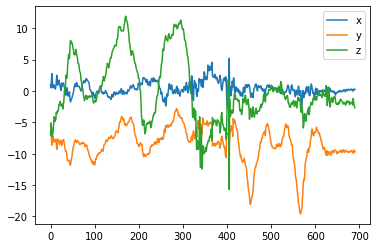

In [21]:
#pandasでcsv読込み
df = pd.read_csv('move_test.csv')

#プロット
df.plot(y=df.columns[0:3])

[[ 0.5  -8.85 -0.69  1.    1.51  4.57]
 [ 0.47 -8.94 -0.41  1.01  1.42  4.61]
 [ 0.45 -8.99 -0.17  1.02  1.38  4.67]
 ...
 [ 0.   -9.64 -1.75  0.21  0.14  0.35]
 [ 0.01 -9.65 -1.77  0.22  0.14  0.36]
 [ 0.02 -9.65 -1.79  0.22  0.14  0.38]]


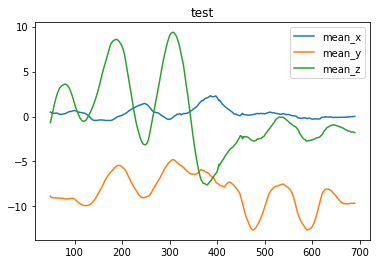

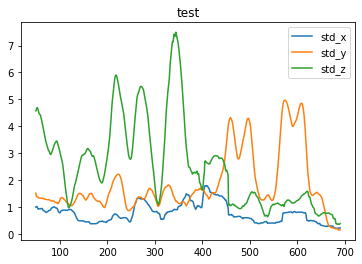

In [22]:
#移動平均と標準偏差のデータに変換
import numpy as np

#移動平均と標準偏差で計算対象とするデータ値
n = 50

#x,y,zのデータ列のみ抜粋
df_xyz = df.iloc[:, 0:3]

#移動平均
df_mean = df_xyz.rolling(n).mean() #n個ずつのデータで平均
df_mean.columns = ['mean_x', 'mean_y', 'mean_z'] #列名を変更

#標準偏差
df_std = df_xyz.rolling(n).std() #n個ずつのデータで標準偏差
df_std.columns = ['std_x', 'std_y', 'std_z'] #列名を変更

#移動平均と標準偏差を横に結合
df_xyz = df_mean.join(df_std)

#NaN（欠損値）データが１つでも含まれる行は削除
df_xyz = df_xyz.dropna()

#プロット
df_xyz.plot(y=df_xyz.columns[0:3], title='test')
df_xyz.plot(y=df_xyz.columns[3:6], title='test')

#データをndarrayに変換してX_testとする
X_test = df_xyz.values

#確認表示
print(X_test)

In [23]:
from sklearn.svm import LinearSVC
import pickle

#モデル読み込み
model = pickle.load(open('model.sav', 'rb')) #rbはread binaryを意味する

#推論
y_pred = model.predict(X_test)

#結果表示
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [24]:
#各ラベルに対するスコアを出す
y_decition = model.decision_function(X_test)
print(y_decition)

#スコアのデータ数
print(len(y_decition))

[[ 1.18 -5.   -5.37]
 [ 1.3  -5.09 -5.66]
 [ 1.41 -5.17 -5.97]
 ...
 [-1.37 -3.96  7.1 ]
 [-1.37 -3.96  7.09]
 [-1.37 -3.96  7.04]]
642


In [25]:
#softmaxを使って確率値に近いものに変換
#値を0.0～1.0の範囲に収める
#全ての値を合計すると1.0になる

from scipy.special import softmax

np.set_printoptions(precision=2, suppress=True)#小数点以下2桁表示で指数表記を禁止

y_prob = softmax(y_decition, axis=1)
print(y_prob)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


<AxesSubplot:>

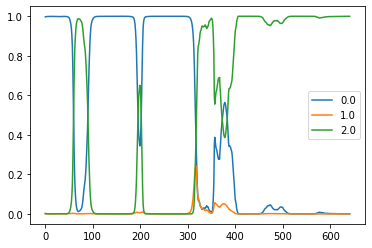

In [26]:
#データフレームに変換
df_y_prob = pd.DataFrame(y_prob)

#列名をラベルにする
df_y_prob.columns = model.classes_ 

#プロット
df_y_prob.plot()